# Linear regression with multiple variables

Week2のLinear regressionの課題について

In [239]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Training data

In [240]:
df_train = pd.read_csv("ex1data2.txt", names=('size', 'bedrooms', 'price'))
df_train.head(5)

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


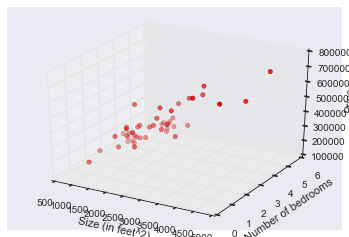

In [241]:
def plot_data():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(df_train['size'], df_train['bedrooms'], df_train['price'], c='red')
    ax.set_xlabel('Size (in feet^2)')
    ax.set_ylabel('Number of bedrooms')
    ax.set_zlabel('Price')
    ax.view_init(elev=10., azim=-75)
    return ax
    
plot_data()
plt.savefig('week02_linregm_train.png')

## Gradient Descent

In [242]:
%run linear_regression_multi.py

In [256]:
X = np.c_[df_train['size'], df_train['bedrooms']]
X = np.c_[np.ones((len(X), 1)), X]

y = np.array(df_train['price'])
y = y.reshape(len(y), 1)

theta = np.zeros((X.shape[1],1))

iterations = 400
alpha = 0.000000003

theta, J_history = gradient_descent_multi(X, y, theta, alpha, iterations)

In [257]:
theta

array([[  8.27768275e-02],
       [  1.64761270e+02],
       [  2.57885491e-01]])

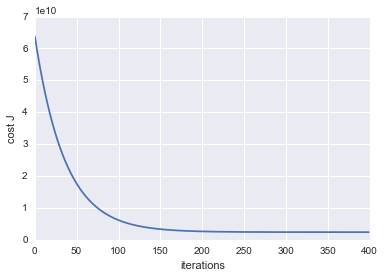

In [245]:
plt.plot(J_history)
plt.xlabel('iterations')
plt.ylabel('cost J')
plt.savefig('week02_linregm_cost_history.png')

In [246]:
gridsize = 4
x0_vals = np.linspace(500, 5000, gridsize)
x1_vals = np.linspace(0, 6, gridsize)
x0_vals, x1_vals = np.meshgrid(x0_vals, x1_vals)

y_vals = np.zeros((gridsize, gridsize))
for i in range(gridsize):
    for j in range(gridsize):
        X_val = np.array([1.0, x0_vals[i, j], x1_vals[i, j]])
        y_vals[i, j] = np.dot(X_val, theta)

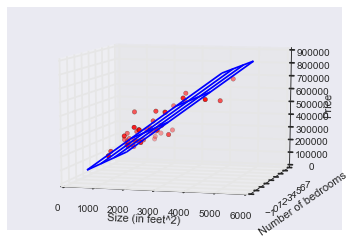

In [247]:
ax = plog_data()
ax.plot_wireframe(x0_vals, x1_vals, y_vals)
plt.savefig('week02_linregm_pred.png')